In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/Megha1624/datasettt/main/eye%20movement.csv"
df = pd.read_csv(url)

In [ ]:
# to describe the mean,median ,std,min of the dataset
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Target
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369957,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.670000,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [ ]:
#
df.head()[:5]

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Target
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0.0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0.0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0.0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0.0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0.0


Text(0, 0.5, 'Frequency')

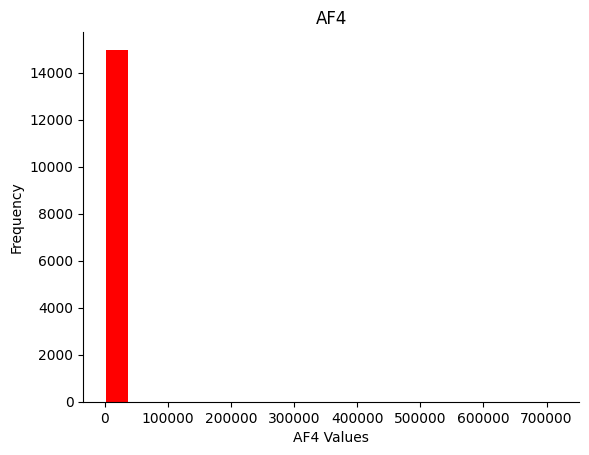

In [ ]:
from matplotlib import pyplot as plt
df['AF4'].plot(kind='hist', bins=20,color = 'red', title='AF4')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Adding x and y axis labels
plt.xlabel('AF4 Values')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

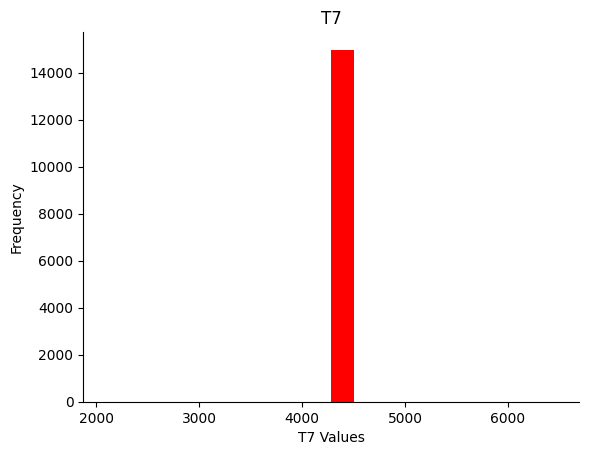

In [ ]:


from matplotlib import pyplot as plt
df['T7'].plot(kind='hist', bins=20,color = 'red', title='T7')
plt.gca().spines[['top', 'right',]].set_visible(False)
# Adding x and y axis labels
plt.xlabel('T7 Values')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

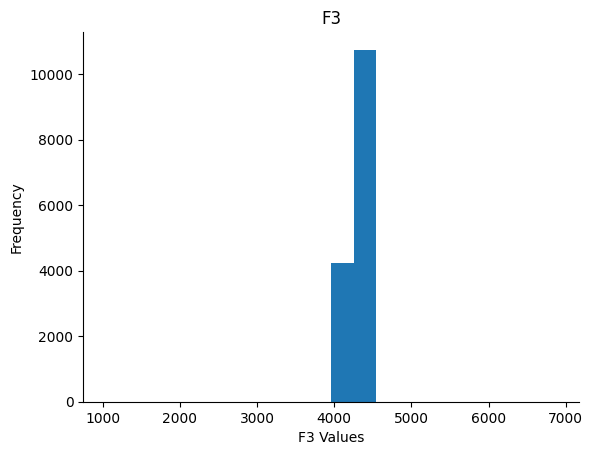

In [ ]:
# @title F3

from matplotlib import pyplot as plt
df['F3'].plot(kind='hist', bins=20, title='F3')
plt.gca().spines[['top', 'right',]].set_visible(False)
# Adding x and y axis labels
plt.xlabel('F3 Values')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

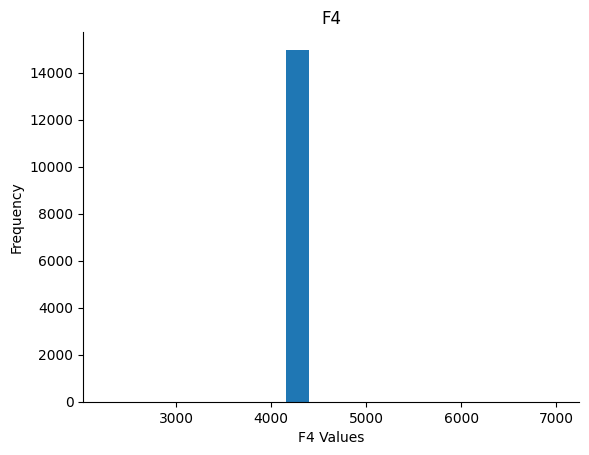

In [ ]:
from matplotlib import pyplot as plt
df['F4'].plot(kind='hist', bins=20, title='F4')
plt.gca().spines[['top', 'right',]].set_visible(False)
# Adding x and y axis labels
plt.xlabel('F4 Values')
plt.ylabel('Frequency')

In [ ]:
df.mean(axis=1)

0        4028.820667
1        4025.232000
2        4024.683333
3        4028.478667
4        4028.444000
            ...     
14975    4005.502667
14976    4001.741333
14977    4002.049333
14978    4007.382667
14979    4011.588667
Length: 14980, dtype: float64

In [ ]:
# In this dataset we check NULL values in the Datset

df.isnull().sum()

AF3       0
F7        0
F3        0
FC5       0
T7        0
P7        0
O1        0
O2        0
P8        0
T8        0
FC6       0
F4        0
F8        0
AF4       0
Target    0
dtype: int64

In [ ]:
df['Feature1_2'] = df['AF3'] + df['F7']  # Combine two existing features
df['Feature3_4'] = df['AF4'] - df['F8']

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize XGBoost classifier with default hyperparameters
xgb_classifier = XGBClassifier(random_state=42)

In [ ]:
# Train the model
xgb_classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict the labels for the test set
y_pred = xgb_classifier.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nXGBoost Classifier Accuracy:", accuracy)


XGBoost Classifier Accuracy: 0.9395861148197597


In [ ]:
# Print classification report
print("\nClassification Report (XGBoost Classifier):")
print(classification_report(y_test, y_pred))


Classification Report (XGBoost Classifier):
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      1586
         1.0       0.95      0.92      0.93      1410

    accuracy                           0.94      2996
   macro avg       0.94      0.94      0.94      2996
weighted avg       0.94      0.94      0.94      2996



In [ ]:

# Print confusion matrix
print("\nConfusion Matrix (XGBoost Classifier):")
conf_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))


Confusion Matrix (XGBoost Classifier):
[[1519   67]
 [ 114 1296]]


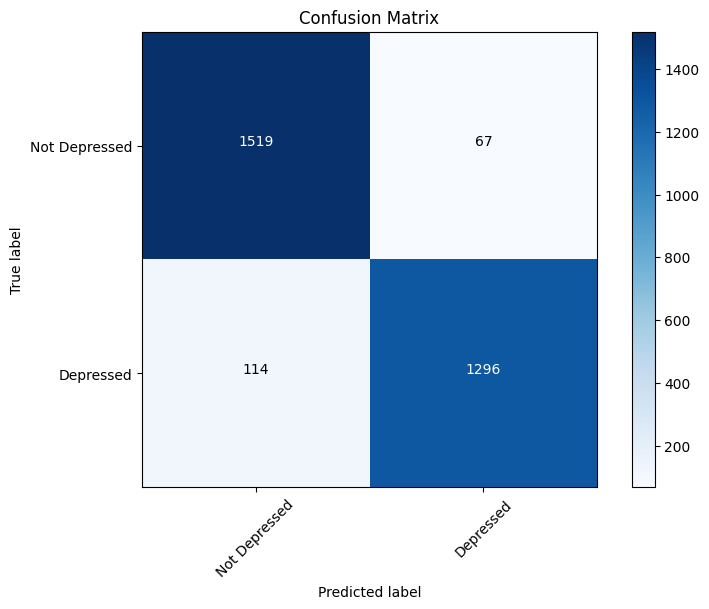

Precision: 0.9508437270726339
Recall: 0.9191489361702128


In [ ]:
import numpy as np
import itertools
from sklearn.metrics import precision_score, recall_score

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Not Depressed', 'Depressed']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


# Labeling the plot
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show plot
plt.show()

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

In [ ]:
\



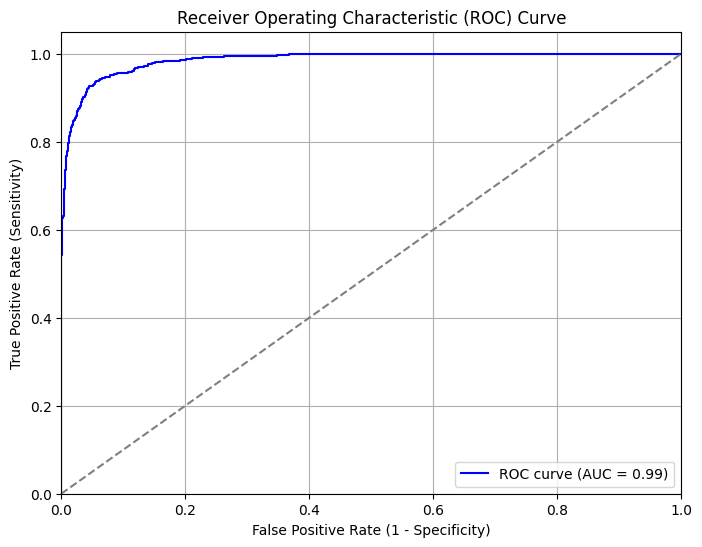

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_classifier.predict_proba(X_test_scaled)[:,1])

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test_scaled)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


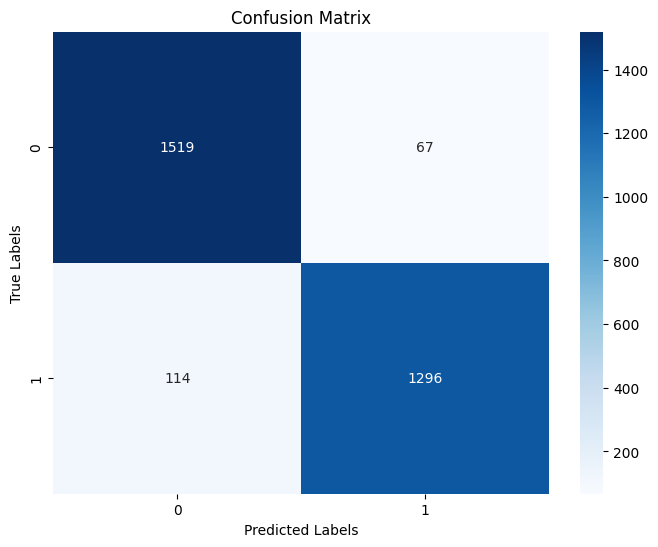

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_classifier.predict(X_test_scaled))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


<Figure size 1000x800 with 0 Axes>

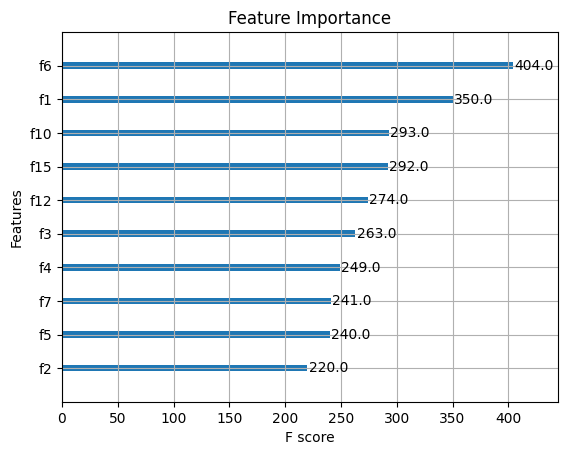

In [ ]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_classifier, max_num_features=10)  # You can adjust the number of features to display
plt.title('Feature Importance')
plt.show()


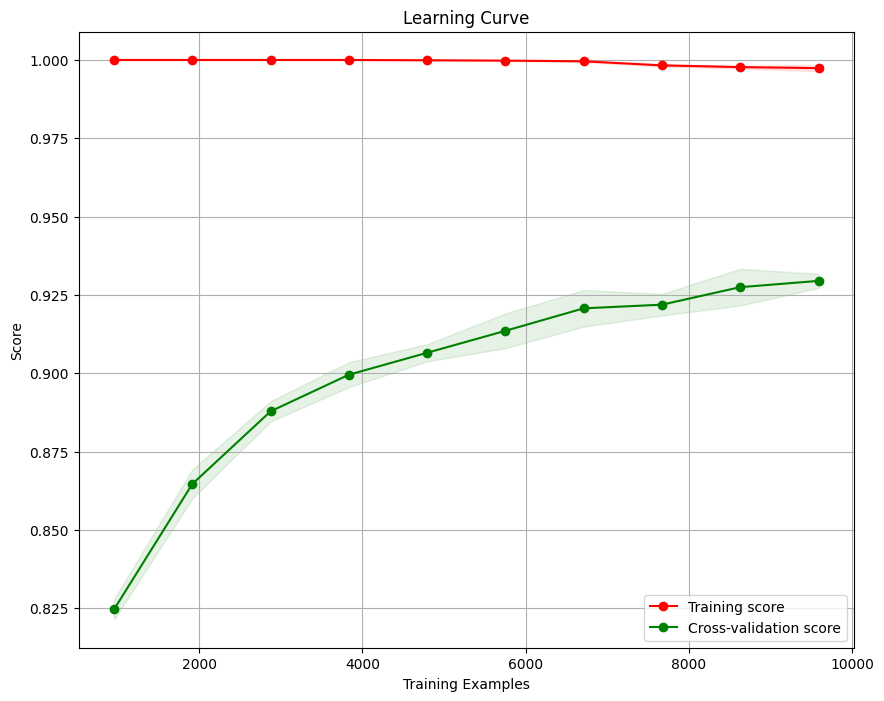

In [ ]:
from sklearn.model_selection import learning_curve

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(xgb_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


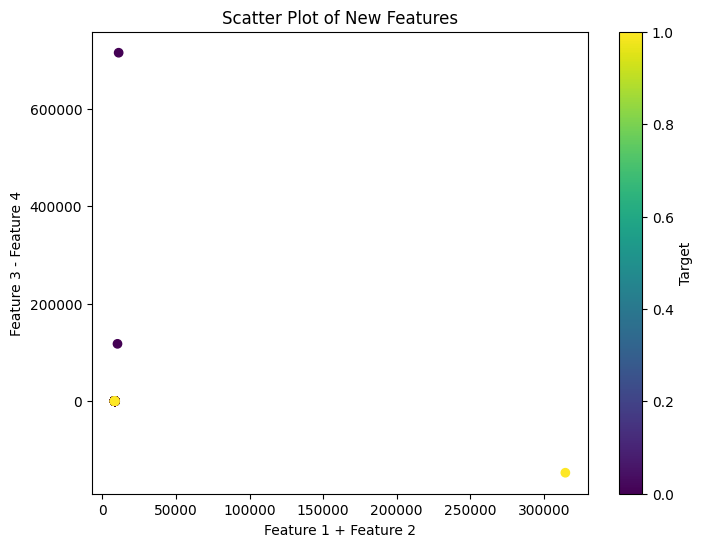

In [ ]:
# Scatter plot using the new features
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Feature1_2'], X_train['Feature3_4'], c=y_train, cmap='viridis')
plt.xlabel('Feature 1 + Feature 2')
plt.ylabel('Feature 3 - Feature 4')
plt.title('Scatter Plot of New Features')
plt.colorbar(label='Target')
plt.show()

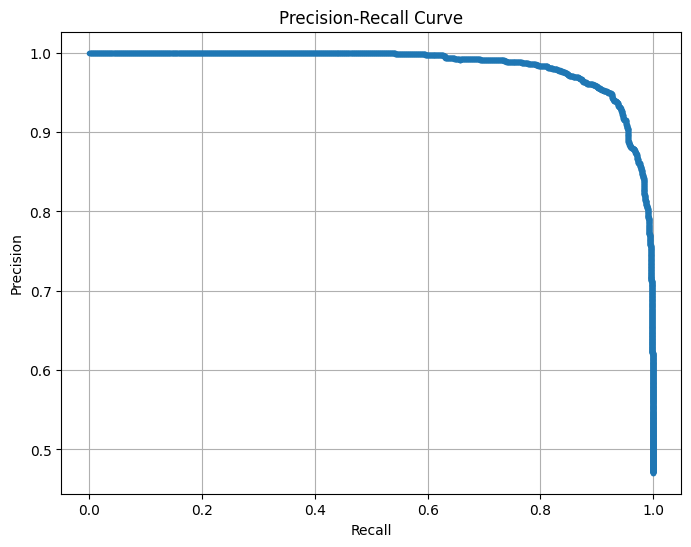

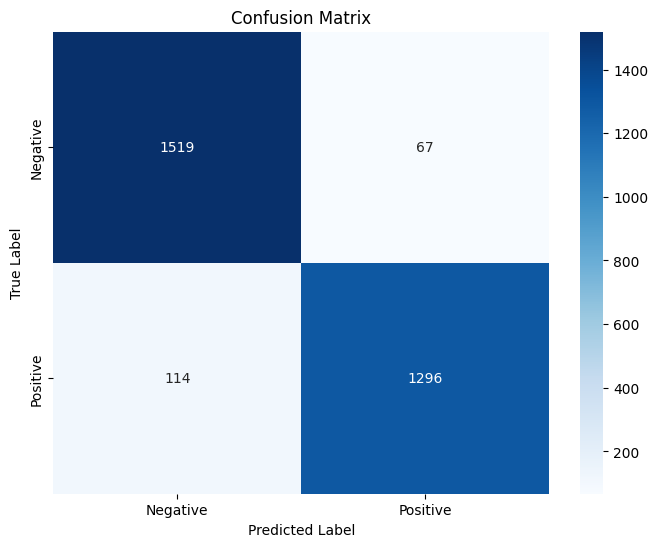

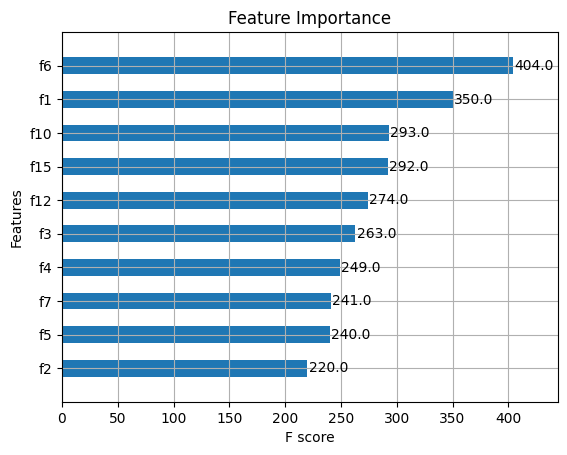

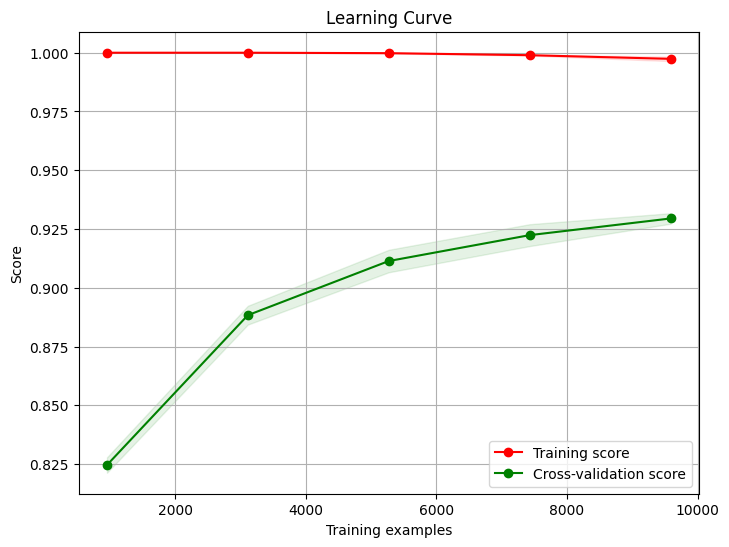

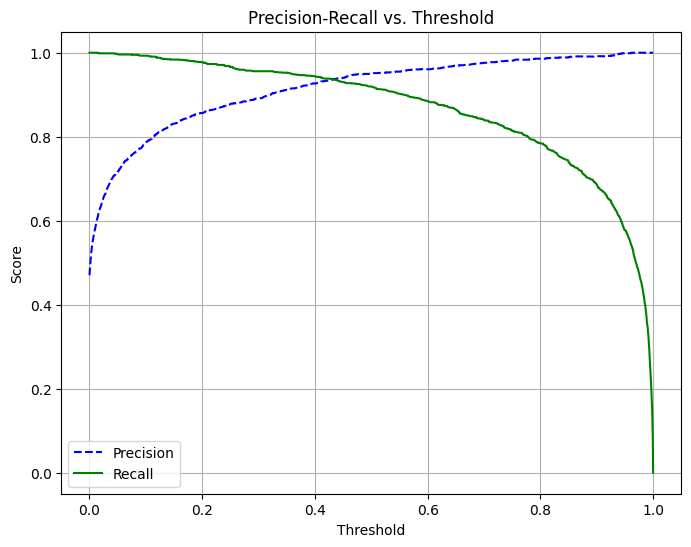

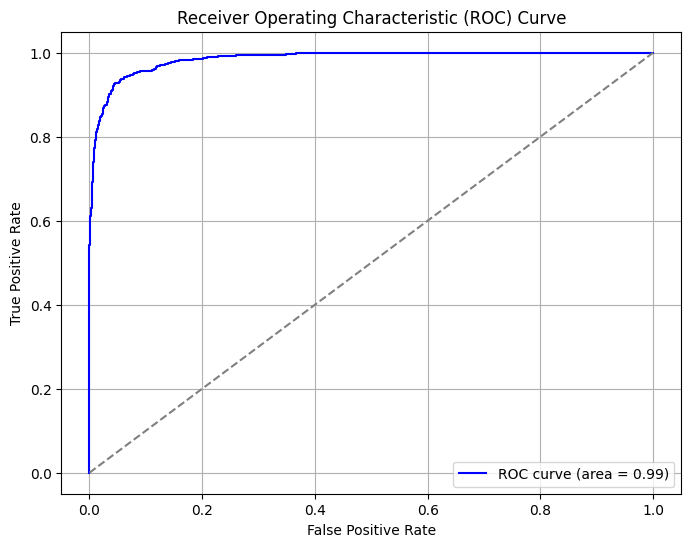

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve
import seaborn as sns
import xgboost as xgb

# Assuming you have already trained your xgb_classifier and have X_test_scaled and y_test

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, xgb_classifier.predict_proba(X_test_scaled)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, xgb_classifier.predict(X_test_scaled))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot feature importance
xgb.plot_importance(xgb_classifier, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Feature Importance')
plt.show()

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(xgb_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, xgb_classifier.predict_proba(X_test_scaled)[:, 1])

# Plot precision and recall against thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.title('Precision-Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()


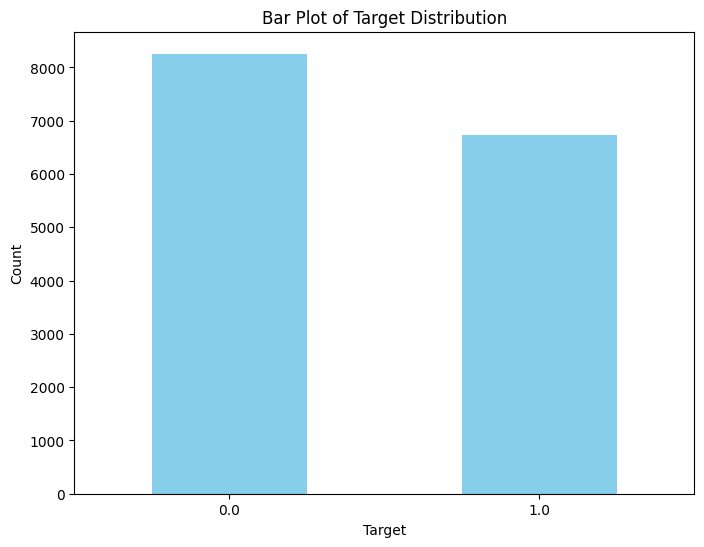

In [ ]:
# Bar plot for Target
plt.figure(figsize=(8, 6))
df['Target'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Bar Plot of Target Distribution')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# After training your XGBoost model
import joblib

# Assuming 'xgb_model' is your trained XGBoost model
joblib.dump(xgb_classifier, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:
#Logistic regression for prediction the depression detection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [ ]:
# Initialize logistic regression model with increased max_iter
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5)

In [ ]:
# Train the model
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_

In [ ]:
# Train the model with the best parameters
logistic_regression_best = LogisticRegression(**best_params, random_state=42)
logistic_regression_best.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, random_state=42)

In [ ]:
# Predict the labels for the test set
y_pred_best = logistic_regression_best.predict(X_test_scaled)

In [ ]:
# Train the model
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predict the labels for the test set
y_pred = logistic_regression.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nLogistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.5704272363150867


In [ ]:
# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("\nLogistic Regression Accuracy (After Hyperparameter Tuning):", accuracy_best)


Logistic Regression Accuracy (After Hyperparameter Tuning): 0.6134846461949266


In [ ]:
# using the  Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
# Train the model
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the labels for the test set
y_pred = random_forest.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nRandomForest Classifier Accuracy:", accuracy)

# Print classification report
print("\nClassification Report (RandomForest Classifier):")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix (RandomForest Classifier):")
print(confusion_matrix(y_test, y_pred))


RandomForest Classifier Accuracy: 0.9285714285714286

Classification Report (RandomForest Classifier):
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      1586
         1.0       0.95      0.90      0.92      1410

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996


Confusion Matrix (RandomForest Classifier):
[[1519   67]
 [ 147 1263]]


In [ ]:
# Print classification report
print("\nClassification Report (Random Forest Classifier):")
print(classification_report(y_test, y_pred))


Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      1586
         1.0       0.95      0.90      0.92      1410

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996



In [ ]:
# using Support vector machine

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize SVM classifier
svm_classifier = SVC(random_state=42)

In [ ]:
# Train the model
svm_classifier.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [ ]:
# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nSVM Classifier Accuracy:", accuracy)


SVM Classifier Accuracy: 0.6151535380507344


In [ ]:
# Print classification report
print("\nClassification Report (SVM Classifier):")
print(classification_report(y_test, y_pred))


Classification Report (SVM Classifier):
              precision    recall  f1-score   support

         0.0       0.59      0.90      0.71      1586
         1.0       0.73      0.29      0.42      1410

    accuracy                           0.62      2996
   macro avg       0.66      0.60      0.57      2996
weighted avg       0.65      0.62      0.57      2996

